In [2]:
#Importing Libraries
import pandas as pd #pandas is used for Data Handling & Analysis Tool
import numpy as np #numpy is used for  Numerical Computation Tool

In [3]:
#Loading the dataset
df=pd.read_csv('/content/sales_data_with_discounts.csv')

In [4]:
df #understanding the dataset

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [5]:
df.columns  #columns names

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [6]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns #Identified numerical columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [7]:
df.info() #understanding null values and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [8]:
df[numerical_columns].mean() #mean calculated for numeric columns,
#mean is average values , helps understand central tendency

,0
Volume,5.066667
Avg Price,10453.433333
Total Sales Value,33812.835556
Discount Rate (%),15.155242
Discount Amount,3346.499424
Net Sales Value,30466.336131


In [9]:
df[numerical_columns].median() #median calculated for numeric columns
#median is middle values when sorted,provied stable central points

,0
Volume,4.000000
Avg Price,1450.000000
Total Sales Value,5700.000000
Discount Rate (%),16.577766
Discount Amount,988.933733
Net Sales Value,4677.788059


In [10]:
df[numerical_columns].mode().iloc[0] #mode calculated for numeric columns
#mode is most frequently occuring value

,0
Volume,3.000000
Avg Price,400.000000
Total Sales Value,24300.000000
Discount Rate (%),5.007822
Discount Amount,69.177942
Net Sales Value,326.974801


In [11]:
df[numerical_columns].std() #standard deviation calculated for numeric columns
#std measures how spread out the values are

,0
Volume,4.231602
Avg Price,18079.904840
Total Sales Value,50535.074173
Discount Rate (%),4.220602
Discount Amount,4509.902963
Net Sales Value,46358.656624


In [12]:
df.describe() #describe shows instant insights into the range and distribution of each numerical column.
#Helps spot outliers, skewness, and missing data.

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


Data Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns #importing libarary for visualization

In [14]:
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

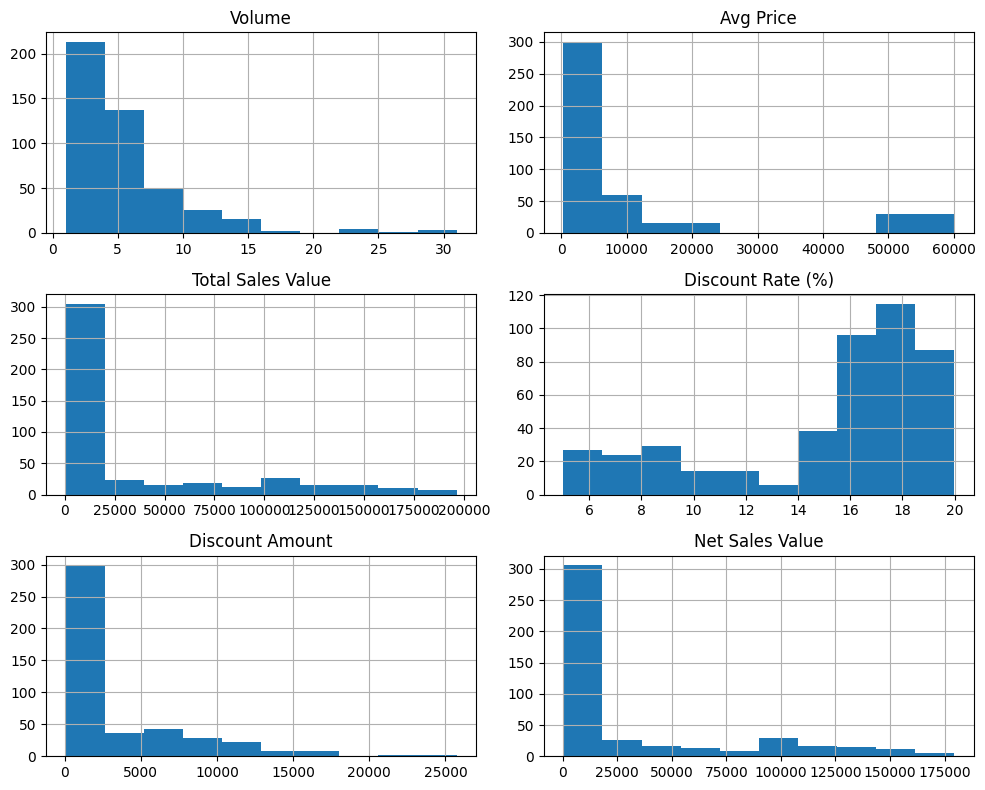

In [15]:
df[numerical_columns].hist(figsize=(10, 8)) #histogram of numeric columns
plt.tight_layout() #adjust the padding between and around the subplots
plt.show() #display all plots

In [16]:
#Histogram are not normally distributed
# Histograms shows thats there is skewness present in the graph,both right and left skewness present some are right skewed and some are left skewed
#Hence Hiatogram are not normally distributed and by looking asymmetric shape of graph yes there is outliers are present.

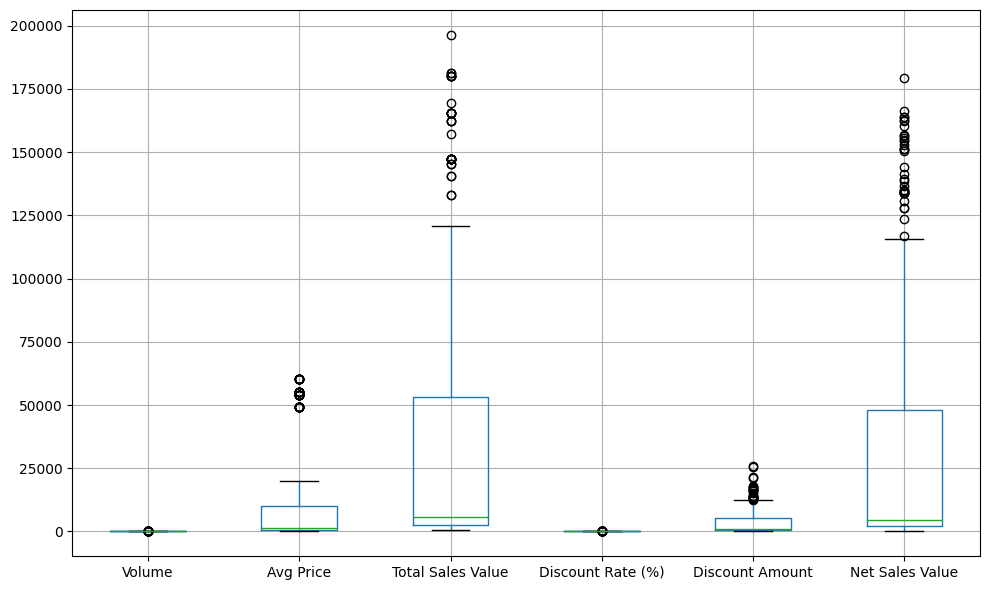

In [17]:
df[numerical_columns].boxplot(figsize=(10,6)) #boxplot of numeric columns
plt.tight_layout() #adjust the padding between and around the subplots
plt.show() #display all plots

In [18]:
# Calculate IQR for each numerical column
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"IQR for {col}: {IQR}")

IQR for Volume: 3.0
IQR for Avg Price: 9635.0
IQR for Total Sales Value: 50500.0
IQR for Discount Rate (%): 4.149655934050962
IQR for Discount Amount: 4856.03612280112
IQR for Net Sales Value: 45645.70420627015


In [19]:
#Outliers : Data points beyond 1.5*IQR (Interquartile Range) from Q1 (25th percentile) or Q3 (75th percentile).
#Extreme :  Data points beyond 3*IQR from Q1 or Q3.

In [20]:
#Identifying Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [21]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


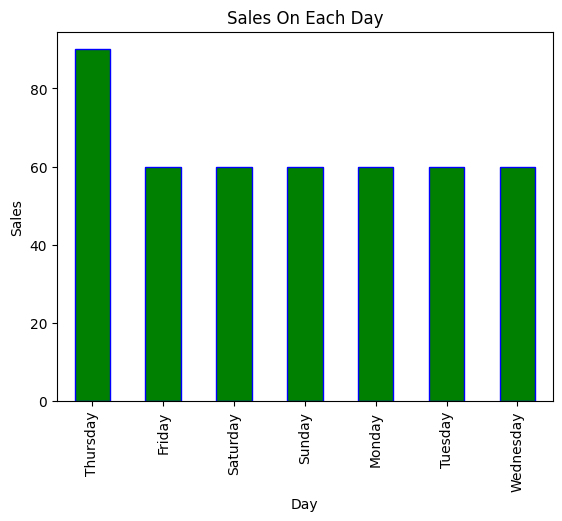

In [22]:
#Creating Bar Chart
df['Day'].value_counts().plot.bar(color='green',edgecolor='blue')
plt.title('Sales On Each Day')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()
#barplot of day indicates that sales are highest on thursday


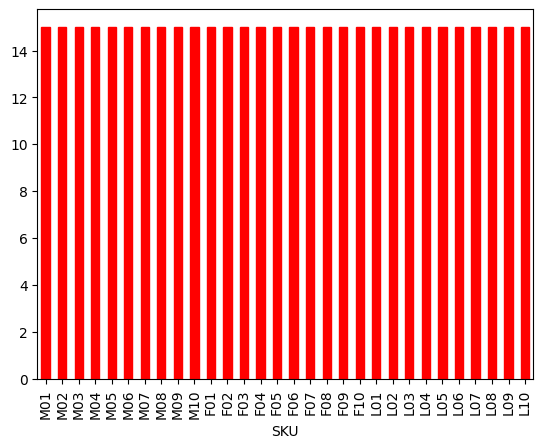

In [23]:
df['SKU'].value_counts().plot.bar(color='red',edgecolor='red')
plt.show()
#barplot of SKU indicates that values are uniform

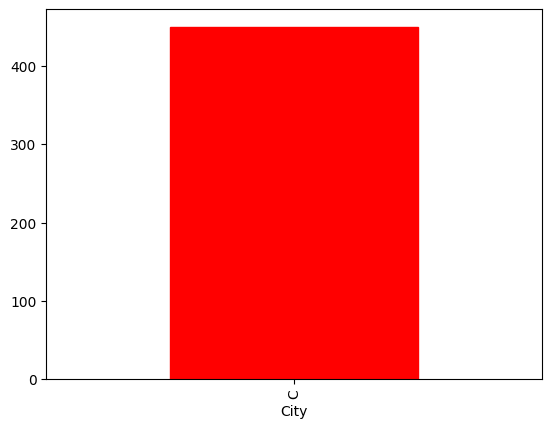

In [24]:
df['City'].value_counts().plot.bar(color='red',edgecolor='red')
plt.show()
#barplot of City indicates a single value

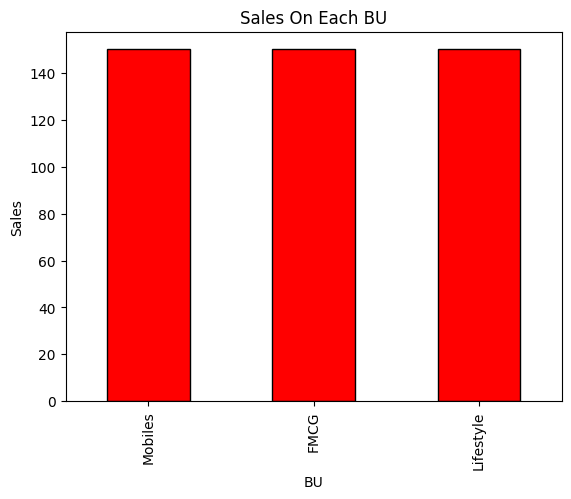

In [25]:
df['BU'].value_counts().plot.bar(color='red',edgecolor='black')
plt.title('Sales On Each BU')
plt.xlabel('BU')
plt.ylabel('Sales')
plt.show()
#barplot of BU indicate sales of each BU are same

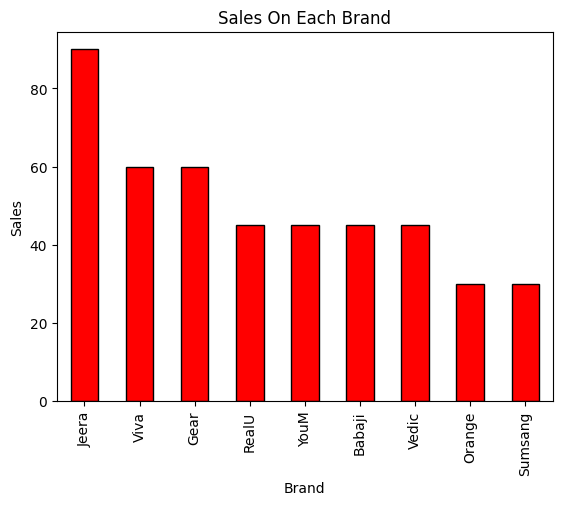

In [26]:
df['Brand'].value_counts().plot.bar(color='red',edgecolor='black')
plt.title('Sales On Each Brand')
plt.xlabel('Brand')
plt.ylabel('Sales')
plt.show()
#barplot of Brand indicate sales of jeera is highest

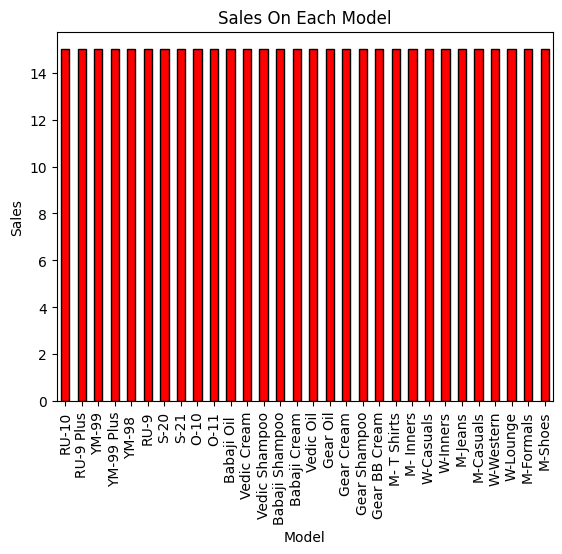

In [27]:
df['Model'].value_counts().plot.bar(color='red',edgecolor='black')
plt.title('Sales On Each Model')
plt.xlabel('Model')
plt.ylabel('Sales')
plt.show()
#barplot of Model indicate sales on each model are same

Standardization of Numerical Variable

In [28]:
#Standardiaztion(z-score normalization) Standardization transforms data to have: Mean (μ) = 0 , Standard deviation (σ) = 1,
#To remove scaling effect we use Z-score,Makes it easier to compare features with different scales
#Z-score range is -3 to 3

In [29]:
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [30]:
#Standardizing the numerical columns
from sklearn.preprocessing import StandardScaler #importung library for standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df[numerical_columns]) # Fit and transform the numerical columns
standardized_df = pd.DataFrame(standardized_data, columns=numerical_columns)# Convert the result back into a DataFrame
# Show first few rows
print(standardized_df.head())

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  
0         2.804756  
1         1.271026  
2         1.545675  
3         1.765810  
4        -0.227595  


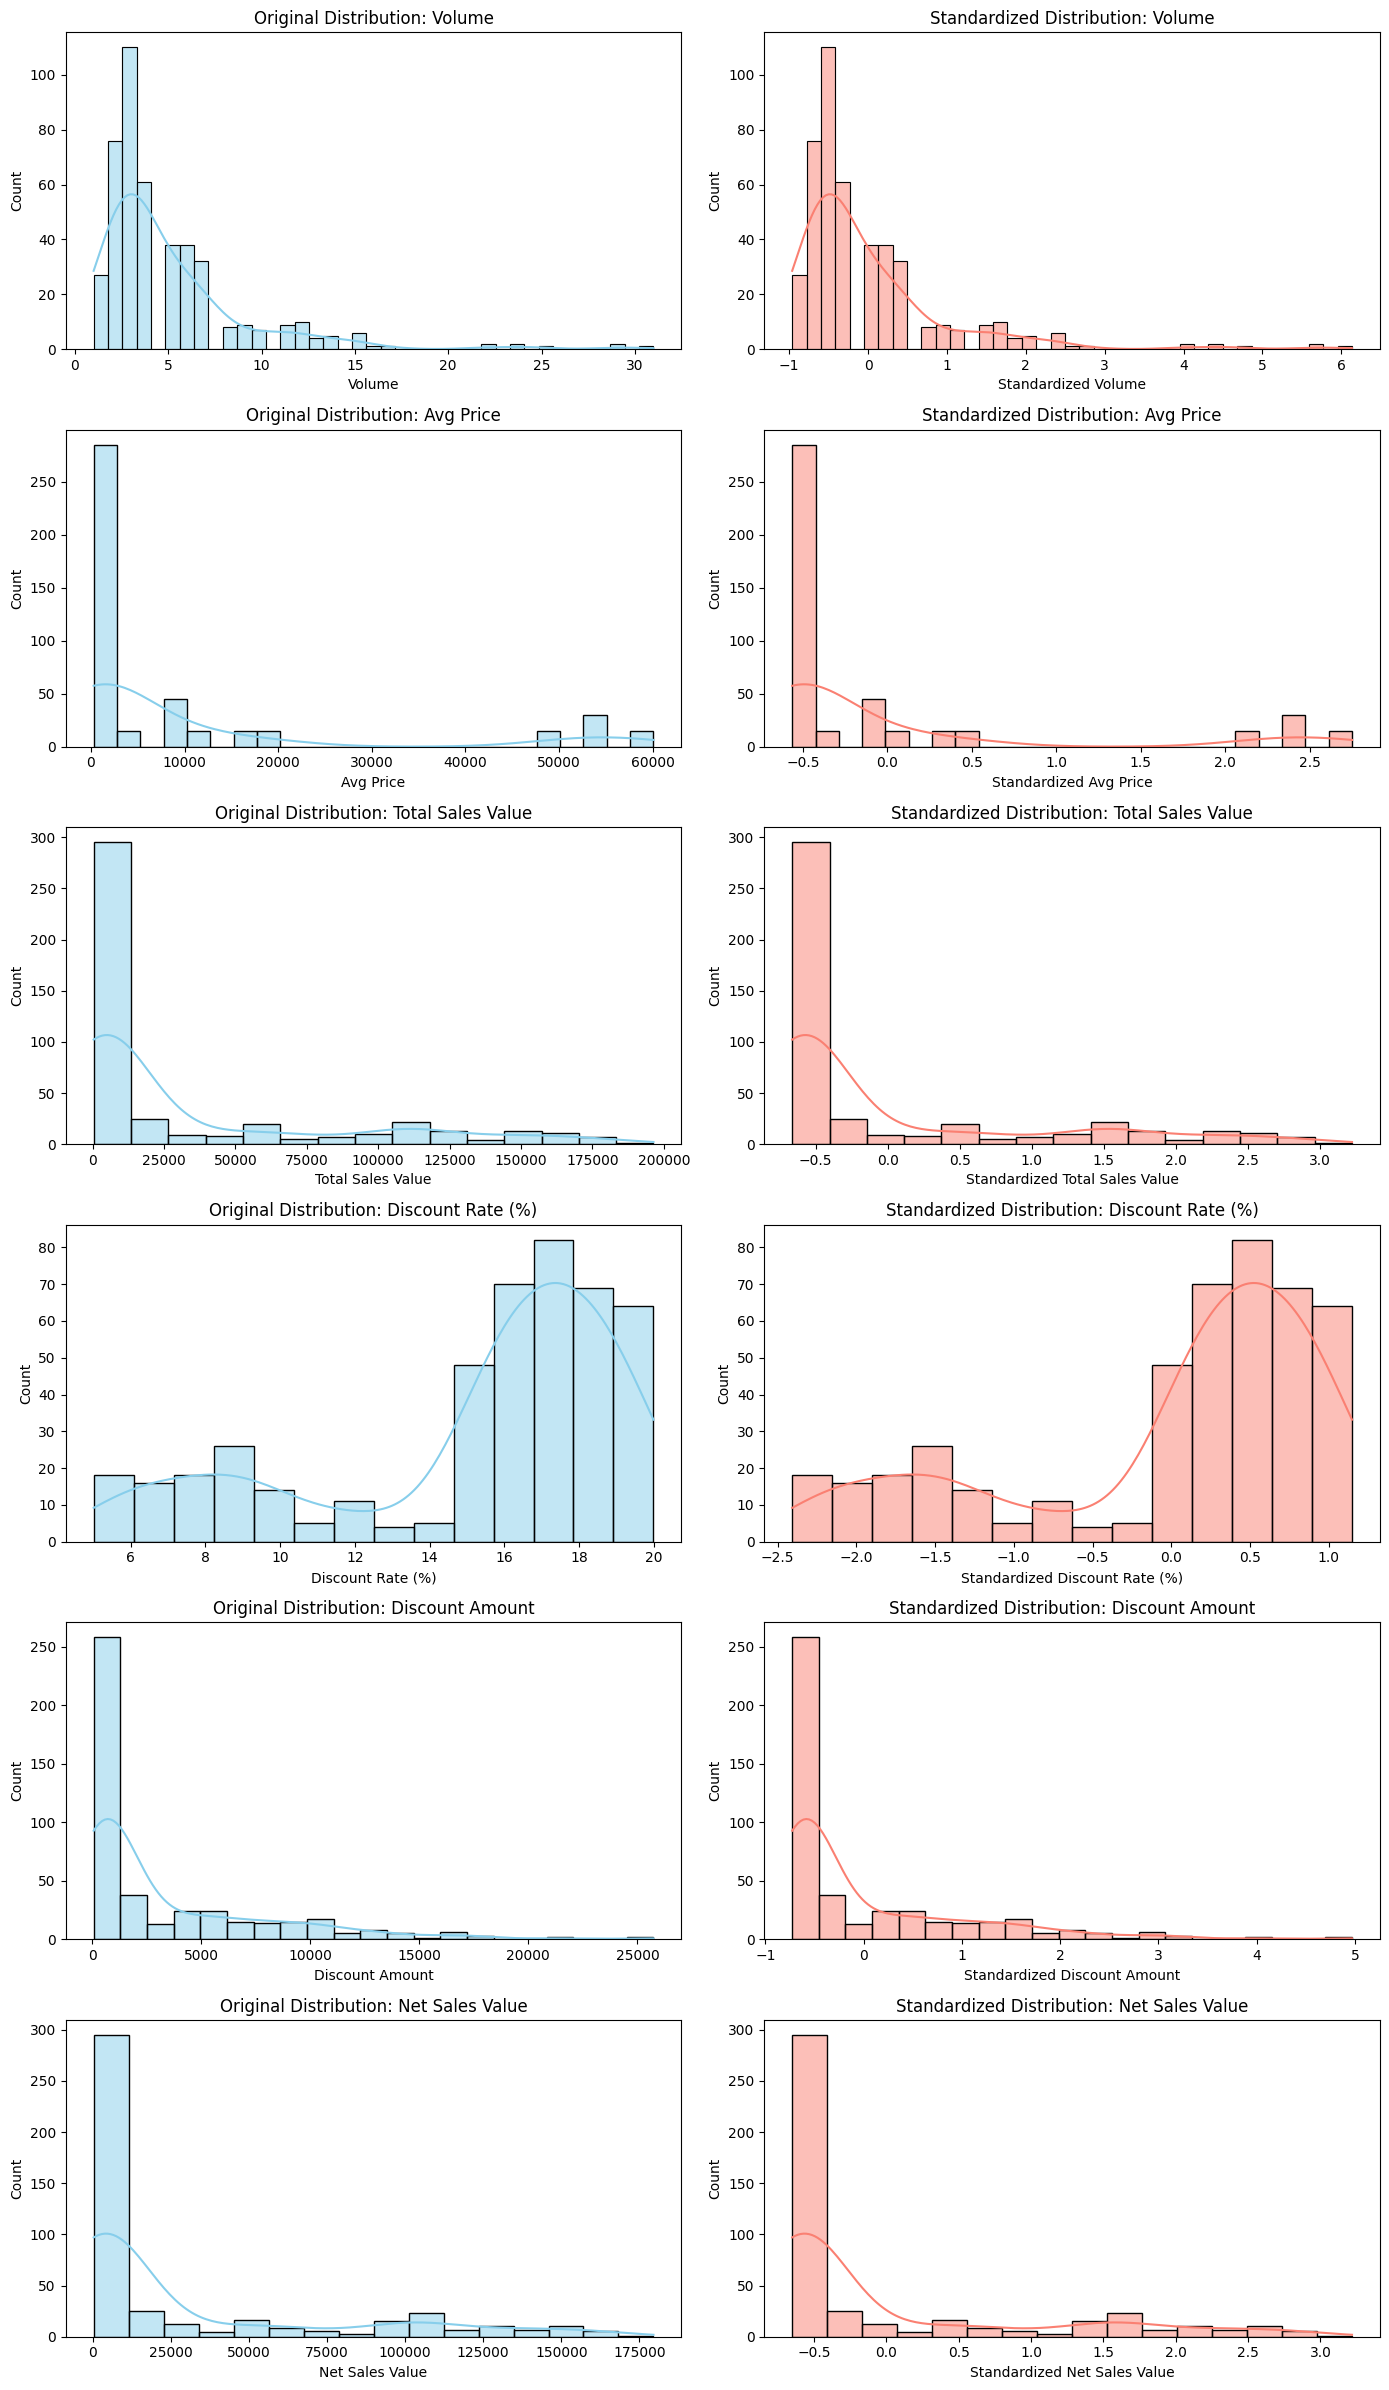

In [31]:
num_cols = len(numerical_columns)
plt.figure(figsize=(14, num_cols * 4))

for i, col in enumerate(numerical_columns):
    # Original
    plt.subplot(num_cols, 2, 2*i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Original Distribution: {col}')
    plt.xlabel(col)

    # Standardized
    plt.subplot(num_cols, 2, 2*i + 2)
    sns.histplot(standardized_df[col], kde=True, color='salmon')
    plt.title(f'Standardized Distribution: {col}')
    plt.xlabel(f'Standardized {col}')

plt.tight_layout()
plt.show()

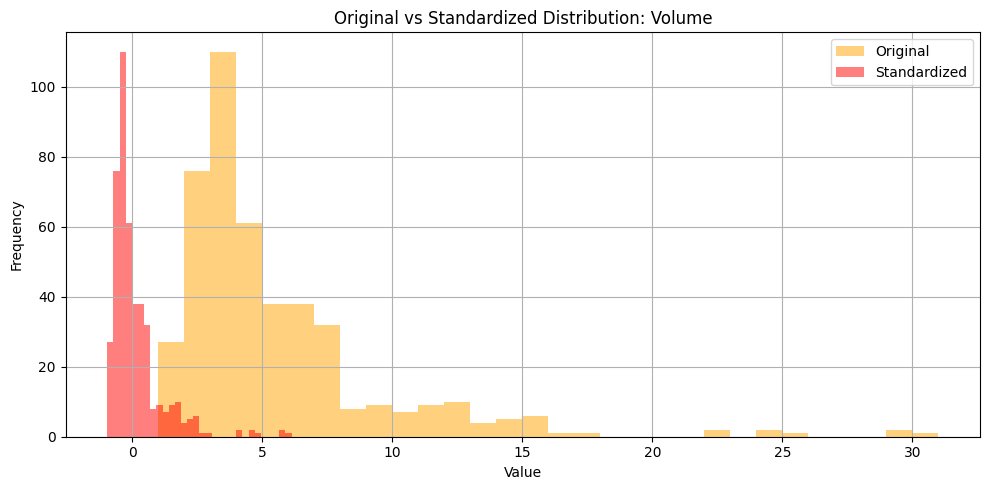

In [32]:
col = 'Volume'
df['Standardized'] = (df[col] - df[col].mean()) / df[col].std()
plt.figure(figsize=(10, 5))
plt.hist(df[col], bins=30, alpha=0.5, label='Original', color='orange')# bin represents a range of values
plt.hist(df['Standardized'], bins=30, alpha=0.5, label='Standardized', color='red')
plt.title(f"Original vs Standardized Distribution: {col}")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#this the comparison of Volume values before and after standardization
#orange colour shows before and red colour shows after standardization values

Conversion of Categorical Data into Dummy Variables

In [33]:
#One-hot encoding turning categories into binary columns (0s and 1s).
#Machine learning models don’t understand text — they need numbers,that's why conversion is needed
#One-hot encoding avoids false ordering which happens if you just convert categories to integers.


In [41]:
#Applying One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)
# View the result
print(df_encoded.head()) #display first 5 rows

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Standardized  Date_01-04-2021  Date_02-04-2021  \
0    160346.501180      2.347417             True            False   
1     89323.897039      1.165831             True            False   
2    102042.089843      0.456880             True            False   
3    112235.925298      0.220563             True            False   
4     19927.053770     -0.488389             True            False   

   Date_03-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...              Fals

Conclusion

In [ ]:
#Descriptive Analytics :
#- Tells about Central tendency and spread of data
#-Data contains a mix of normal and skewed distributions.
#Tells about Outliers

#Data Visualization :
#Visualizations helped spot patterns, skewness, and irregularities that numbers alone wouldn't show.

#Preproceesion steps:
#Preprocessing steps like standardization and encoding are essential for analysis and modeling.
#Standardization ensures all numerical features are on the same scale
#One-hot encoding converts categorical data into numeric form
#Together, these steps make the data clean, consistent, and model-ready, leading to more accurate and reliable results.